# 线性回归 boston房价预测
导入相关包

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# 加载csv数据集
data = pd.read_csv("house_data.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# 提取输入特征 (X) 和标签 (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)  # Reshape y to a column vector

In [4]:
# 标准化输入特征，查询用法及原因
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)
# fit_transform方法计算出数据集的均值和标准差，
# 并将数据集进行标准化处理，返回标准化后的数据集
# 原因：标准化输入特征可以提高深度学习算法的性能，
# 加快模型的收敛速度，并且使得输入特征满足模型的要求

In [5]:
# 利用train_test_split 函数将数据集划分为训练集和测试集
X, X_test, y, y_test = train_test_split(X, y, random_state = 0)

将数据转换为 PyTorch 张量

In [6]:
X = torch.from_numpy(X).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)

y = torch.from_numpy(y).to(torch.float32)
y_test = torch.from_numpy(y_test).to(torch.float32)

In [7]:
# 创建用于批量训练的 DataLoader(将dataset划分为每批次大小为20的数据,并以随机顺序加载)
dataset = torch.utils.data.TensorDataset(X, y) # 将X和y合成数据集dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=20, shuffle=True)

利用pytorch封装好的nn.Module创建LinearRegression模型

In [8]:
# 定义一个简单的线性回归模型
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        
        # 定义线性回归层
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        # 定义计算图传播
        output = self.linear(x)
        return output

In [9]:
# 初始化模型
model = LinearRegression(input_dim=X.shape[1])

# 定义损失函数和优化器
criterion = nn.MSELoss()

# 可以尝试多种优化方法和学习率
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [10]:
# 训练循环
num_epochs = 10
iters, train_costs = [], []

for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        # # 前向传播
        output = model(batch_X)
        
        # 计算loss
        loss = criterion(output, batch_y)
        
        # 反向传播和优化：(1) 梯度归零
        #               (2) 反向传播计算每个参数的梯度
        #               (3) 通过梯度下降更新参数
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_costs.append(loss.item())

        # 打印输出训练进度
        if len(train_costs) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], \
                  Step [{len(train_costs)}], Loss: {loss.item():.4f}")

Epoch [1/10],                   Step [10], Loss: 0.6204
Epoch [2/10],                   Step [20], Loss: 0.5440
Epoch [2/10],                   Step [30], Loss: 0.8448
Epoch [3/10],                   Step [40], Loss: 0.5269
Epoch [3/10],                   Step [50], Loss: 1.0403
Epoch [4/10],                   Step [60], Loss: 1.3687
Epoch [4/10],                   Step [70], Loss: 1.4001
Epoch [5/10],                   Step [80], Loss: 0.6859
Epoch [5/10],                   Step [90], Loss: 0.7224
Epoch [6/10],                   Step [100], Loss: 0.9359
Epoch [6/10],                   Step [110], Loss: 0.5631
Epoch [7/10],                   Step [120], Loss: 0.3390
Epoch [7/10],                   Step [130], Loss: 0.2987
Epoch [8/10],                   Step [140], Loss: 0.6041
Epoch [8/10],                   Step [150], Loss: 1.3811
Epoch [9/10],                   Step [160], Loss: 0.3012
Epoch [9/10],                   Step [170], Loss: 0.4378
Epoch [10/10],                   Step [1

保存模型

In [11]:
torch.save(model.state_dict(), 'linear.pth')

打印输出模型参数w和b

In [12]:
# 提取模型参数
model_params = model.state_dict()

# 打印输出模型参数
print('w:',model_params['linear.weight'].numpy())
print('b:',model_params['linear.bias'].numpy())

w: [[-0.23871882 -0.09291891 -0.14103544  0.15478209 -0.13792872 -0.04069131
  -0.09298387 -0.14509183 -0.1466938   0.08407329 -0.19768311 -0.02317551
  -0.2508973 ]]
b: [0.04400066]


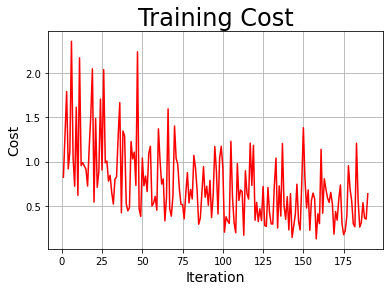

In [13]:
# 绘制训练过程
iters = list(range(1, len(train_costs) + 1))
plt.plot(iters, train_costs, color='red', label='training cost')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Training Cost", fontsize=24)
plt.grid()
plt.show()

对测试集进行预测

In [14]:
# 设置模型为评估模式
model.eval()

LinearRegression(
  (linear): Linear(in_features=13, out_features=1, bias=True)
)

In [15]:
with torch.no_grad():
    # 输出预测值predictions
    predictions = model(X_test)
    print(predictions)

tensor([[ 0.9189],
        [-0.4290],
        [ 0.9140],
        [-1.2767],
        [ 0.2722],
        [ 0.1769],
        [-0.2868],
        [ 0.2303],
        [ 0.4269],
        [ 0.2324],
        [-2.6024],
        [-0.8996],
        [-0.8130],
        [-1.5295],
        [ 1.1944],
        [ 0.7662],
        [-0.3070],
        [ 0.9326],
        [ 0.9317],
        [ 0.4938],
        [ 0.3810],
        [ 0.3165],
        [ 0.0905],
        [ 0.5734],
        [ 0.5662],
        [-0.5093],
        [-0.0993],
        [-0.0475],
        [ 0.7269],
        [ 0.1476],
        [-0.7953],
        [-0.6962],
        [ 0.0128],
        [ 0.3255],
        [ 0.6718],
        [-0.0122],
        [-1.5720],
        [ 0.2481],
        [-0.5885],
        [-0.8502],
        [ 0.6769],
        [ 0.4228],
        [ 0.7756],
        [-0.6657],
        [ 0.7418],
        [ 0.4272],
        [ 0.2522],
        [ 0.5667],
        [-0.5059],
        [ 0.1900],
        [ 0.6138],
        [ 0.1720],
        [ 0.

输出测试集的loss

In [16]:
test_loss = criterion(predictions, y_test)
print(f"Test_loss :{test_loss.item():.6f}")

Test_loss :0.662227


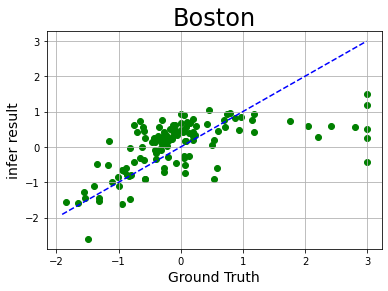

In [17]:
# 绘制实际值 vs. 预测值
plt.scatter(y_test.numpy(), predictions, color='green', label='infer result')
plt.xlabel("Ground Truth", fontsize=14)
plt.ylabel("infer result", fontsize=14)
plt.title("Boston", fontsize=24)
plt.plot([min(y.numpy()), max(y.numpy())], [min(y.numpy()), max(y.numpy())], color='blue', linestyle='--')
plt.grid()
plt.show()

## 正规方程求解 $θ=(𝑋^𝑇 𝑋)^{−1} 𝑋^𝑇 𝑌$

首先将x扩维，沿第二个轴，添加一列全1向量

In [18]:
X_extend = torch.ones((X.shape[0], 1), dtype=torch.float32)
X = torch.cat((X_extend, X), dim=1)
X

tensor([[ 1.0000, -0.3983,  0.4565,  ...,  0.2980,  0.3559,  0.8140],
        [ 1.0000, -0.4085,  0.5853,  ...,  0.5754,  0.4411, -0.4812],
        [ 1.0000, -0.4083,  1.2291,  ..., -0.3956,  0.3572, -0.9256],
        ...,
        [ 1.0000, -0.4029, -0.4877,  ..., -0.3031,  0.4148, -0.3298],
        [ 1.0000, -0.3938, -0.4877,  ..., -0.2569,  0.3954,  0.8616],
        [ 1.0000, -0.4043, -0.4877,  ..., -0.8579,  0.4411,  0.2855]])

计算w，提示函数：torch.mm(), torch.linalg.inv()   {torch框架} 
或者np.dot(),np.linalg.inv()                    {Numpy框架}

In [19]:
XT_mul_X = torch.mm(X.T, X)
XT_mul_Y = torch.mm(X.T, y)
sita = torch.mm(torch.linalg.inv(XT_mul_X), XT_mul_Y)

计算预测值predict

In [20]:
predict = torch.mm(X, sita)

画图显示

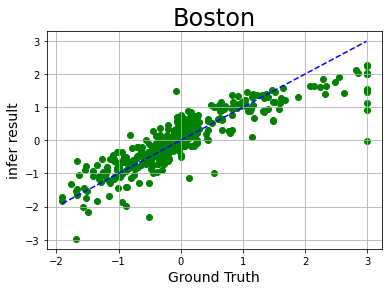

In [21]:
plt.scatter(y.numpy(), predict, color='green', label='infer result')
plt.xlabel("Ground Truth", fontsize=14)
plt.ylabel("infer result", fontsize=14)
plt.title("Boston", fontsize=24)
plt.plot([min(y.numpy()), max(y.numpy())], [min(y.numpy()), max(y.numpy())], color='blue', linestyle='--')
plt.grid()
plt.show()

# 附加练习
对损失函数添加L2 L1正则化项。提示：利用model.parameters() 获取参数的值，将正则化项损失加到loss上进行优化。结合正常优化代码输出优化结果及示意图。

In [22]:
# 提取输入特征 (X1) 和标签 (y1)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)  # Reshape y to a column vector

# 标准化输入特征
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# 利用train_test_split()函数将数据集划分为训练集和测试集
X, X_test, y, y_test = train_test_split(X, y, random_state = 0)

In [23]:
# 将数据转换为Pytorch张量
X = torch.from_numpy(X).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)

y = torch.from_numpy(y).to(torch.float32)
y_test = torch.from_numpy(y_test).to(torch.float32)

# 创建用于批量训练的 DataLoader(将dataset划分为每批次大小为20的数据,并以随机顺序加载)
dataset = torch.utils.data.TensorDataset(X, y) # 将X和y合成数据集dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=20, shuffle=True)

In [24]:
# 定义L1正则化函数
def L1_Regularization(model, lamda_L1):
    extra_loss = 0
    for param in model.parameters():
        extra_loss += lamda_L1 * torch.norm(param, 1)
    return extra_loss

# 定义L2正则化函数
def L2_Regularization(model, lamda_L2):
    extra_loss = 0
    for param in model.parameters():
        extra_loss += lamda_L2 * torch.norm(param, 2)
    return extra_loss

In [25]:
# 训练循环
num_epochs = 10
iters, train_costs = [], []

# 初始化模型
model = LinearRegression(input_dim = X.shape[1])

# 获取模型参数
parameters = model.parameters()

# 定义损失函数
criterion = nn.MSELoss()

# 定义L1和L2正则化参数
lamda_L1 = 0.01
lamda_L2 = 0.01

# 定义优化器，增加L2正则化项
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        # 前向传播
        output = model(batch_X)
        
        # 计算增加L1和L2正则项后的loss
        # 1.计算L1和L2正则化
        extra_L1 = L1_Regularization(model, lamda_L1)
        extra_L2 = L2_Regularization(model, lamda_L2)
        
        # 2.向loss中加入L1和L2正则化项
        loss = criterion(output, batch_y)
        loss += (extra_L1 + extra_L2)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_costs.append(loss.item())
        
        # 打印输出训练进度
        if len(train_costs) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], \
                  Step [{len(train_costs)}], Loss: {loss.item():.4f}")

Epoch [1/10],                   Step [10], Loss: 2.1174
Epoch [2/10],                   Step [20], Loss: 1.3450
Epoch [2/10],                   Step [30], Loss: 1.5359
Epoch [3/10],                   Step [40], Loss: 1.4504
Epoch [3/10],                   Step [50], Loss: 1.4710
Epoch [4/10],                   Step [60], Loss: 0.7378
Epoch [4/10],                   Step [70], Loss: 0.8947
Epoch [5/10],                   Step [80], Loss: 0.2725
Epoch [5/10],                   Step [90], Loss: 0.3991
Epoch [6/10],                   Step [100], Loss: 0.5952
Epoch [6/10],                   Step [110], Loss: 0.6999
Epoch [7/10],                   Step [120], Loss: 0.5907
Epoch [7/10],                   Step [130], Loss: 0.3814
Epoch [8/10],                   Step [140], Loss: 0.2792
Epoch [8/10],                   Step [150], Loss: 0.5353
Epoch [9/10],                   Step [160], Loss: 0.3922
Epoch [9/10],                   Step [170], Loss: 0.5738
Epoch [10/10],                   Step [1

In [26]:
# 保存模型
torch.save(model.state_dict(), 'linear.pth')

In [27]:
# 打印输出模型参数w和b
# 提取模型参数
model_params = model.state_dict()

# 打印输出模型参数
print('w:',model_params['linear.weight'].numpy())
print('b:',model_params['linear.bias'].numpy())

w: [[-0.10159766 -0.09568439  0.09871829  0.16728146 -0.31876835  0.23888595
  -0.13026586  0.09246702 -0.04047787  0.08750919 -0.24102329 -0.01454952
  -0.00546678]]
b: [0.15390243]


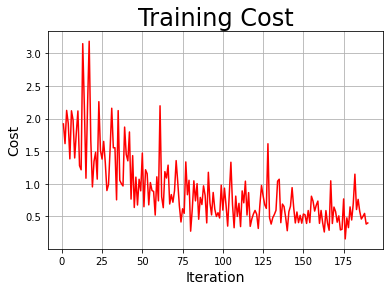

In [28]:
# 绘制训练过程
iters = list(range(1, len(train_costs) + 1))
plt.plot(iters, train_costs, color='red', label='training cost')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Training Cost", fontsize=24)
plt.grid()
plt.show()

In [29]:
# 对测试集进行预测
# 设置模型为评估模式
model.eval()

with torch.no_grad():
    # 输出预测值predictions
    predictions = model(X_test)
    print(predictions)

tensor([[ 0.8723],
        [-0.4324],
        [ 0.9862],
        [-1.0531],
        [ 0.6342],
        [-0.1868],
        [-0.0551],
        [-0.0686],
        [-0.2029],
        [-0.0477],
        [-1.3379],
        [-0.1861],
        [-0.5975],
        [-1.3401],
        [ 1.5604],
        [ 1.3195],
        [ 0.1461],
        [ 1.4471],
        [ 0.6118],
        [ 0.1268],
        [ 0.2961],
        [ 0.2596],
        [-0.2195],
        [ 0.5510],
        [ 0.4387],
        [-1.2344],
        [-0.3213],
        [-0.5574],
        [ 0.9565],
        [ 0.0475],
        [-0.3574],
        [-0.5440],
        [ 0.3859],
        [ 0.5571],
        [ 0.3061],
        [-0.1558],
        [-0.8677],
        [ 0.0701],
        [-0.1072],
        [-0.2313],
        [ 1.0489],
        [ 0.4732],
        [ 0.7675],
        [-0.4853],
        [ 0.7314],
        [ 0.4429],
        [ 0.7805],
        [ 0.2617],
        [-0.8800],
        [ 0.0403],
        [ 0.3436],
        [-0.0625],
        [ 0.

In [30]:
# 输出测试集的loss
test_loss = criterion(predictions, y_test)
print(f"Test_loss :{test_loss.item():.6f}")

Test_loss :0.625849


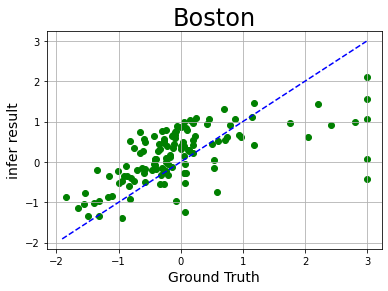

In [31]:
# 绘制实际值 vs. 预测值
plt.scatter(y_test.numpy(), predictions, color='green', label='infer result')
plt.xlabel("Ground Truth", fontsize=14)
plt.ylabel("infer result", fontsize=14)
plt.title("Boston", fontsize=24)
plt.plot([min(y.numpy()), max(y.numpy())], [min(y.numpy()), max(y.numpy())], color='blue', linestyle='--')
plt.grid()
plt.show()